In [3]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [25]:
url = "https://www.swift.ac.uk/user_objects/tprods/USERPROD_11462/lc/curve.qdp"
lightcurve = pd.read_table(url, header=11).apply(pd.to_numeric, errors="coerce")
lightcurve.rename(columns={"!Time    ":"Time",'T_+ve   ':"Tpos", 'T_-ve   ':"Tneg", 'Rate    ':"Rate", 'Ratepos ':"Ratepos"},
                  inplace=True)
lightcurve[["Time","Tpos","Tneg"]]# /= 86400 # convert seconds to days (optionally)
lims_filter = [1 if err==0 else 0 for err in lightcurve.Ratepos] # flag for if count rate is an upper limit
lightcurve.Rateneg += 0.4*lightcurve.Rate*np.array(lims_filter)

Text(0.5, 1.0, 'HD 100199 Swift-$XRT$ lightcurve')

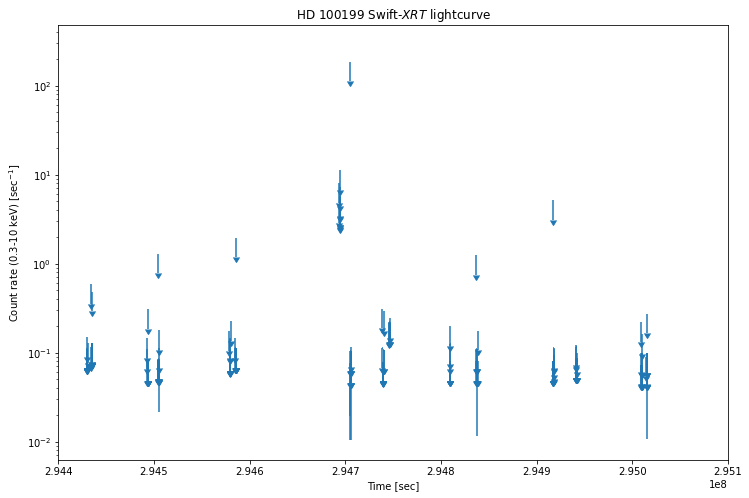

In [58]:
fig,ax = plt.subplots(figsize=(12,8))
ax.errorbar(lightcurve.Time,lightcurve.Rate,xerr=np.array(lightcurve.Tneg,lightcurve.Tpos).T,
             yerr=np.array(lightcurve.Rateneg,lightcurve.Ratepos).T,uplims=lims_filter,marker="",linestyle="")
ax.set_xlim(2.944e8,2.951e8)
#ax.set_ylim(0.06,2)
#ax.set_xticklabels([f"{label/86400:.3f}" for label in ax.get_xticks()])
ax.set_yscale("log")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Count rate (0.3-10 keV) [sec$^{-1}$]")
plt.title("HD 100199 Swift-$XRT$ lightcurve")
#plt.savefig("plot_5.44-5.53_Ms.png",bbox_inches="tight",dpi=300)